<a href="https://colab.research.google.com/github/thequickbrownfoxjumpedoverthelazydog/2022-HiMCM-Python-Models/blob/main/Python%20Models/Year_VS_PPM_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

	
df = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df = df[["Year", "PPM"]]

df = df.rename(columns={"Year":"ds", "PPM": "y"})
df = df.drop(63)
df

,ds,y
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66
61,2020.0,414.24


In [ ]:
import math
# for x in df['ds']:
#   print(str(math.trunc(x)) + "-01-01")
#   df["ds"]

df["year"] = df["ds"].apply(lambda x: str(x)[:4])
# print(df["year"])
df["ds"] = pd.DatetimeIndex(df["year"]+"-01"+"-01")
print(df["ds"])

0    1959-01-01
1    1960-01-01
2    1961-01-01
3    1962-01-01
4    1963-01-01
        ...    
58   2017-01-01
59   2018-01-01
60   2019-01-01
61   2020-01-01
62   2021-01-01
Name: ds, Length: 63, dtype: datetime64[ns]


In [ ]:
# df.dtypes
# df.head()
df.drop(["year"], axis=1, inplace=True)
df.head()

,ds,y
0,1959-01-01,315.98
1,1960-01-01,316.91
2,1961-01-01,317.64
3,1962-01-01,318.45
4,1963-01-01,318.99


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6s8tdlre/ykr_d8kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6s8tdlre/cs8937g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48612', 'data', 'file=/tmp/tmp6s8tdlre/ykr_d8kh.json', 'init=/tmp/tmp6s8tdlre/cs8937g0.json', 'output', 'file=/tmp/tmp6s8tdlre/prophet_modelr0y5o5i0/prophet_model-20221116013337.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=40, freq="Y")
future.tail()

,ds
98,2056-12-31
99,2057-12-31
100,2058-12-31
101,2059-12-31
102,2060-12-31


In [ ]:
future

,ds
0,1959-01-01
1,1960-01-01
2,1961-01-01
3,1962-01-01
4,1963-01-01
...,...
98,2056-12-31
99,2057-12-31
100,2058-12-31
101,2059-12-31


In [ ]:
# from prophet import Prophet

# # try: 
# prophet = Prophet(daily_seasonality=False, growth="linear", changepoint_range=0.9)
# prophet.fit(df)

# future_preds = prophet.make_future_dataframe(periods=100, freq="Y")
# predictions = prophet.predict(future_preds)
# # except Exception as e: print(e)
# # print(type(df["ds"][0]))

In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-01-01,18.835575,315.757673,316.547763,18.835575,18.835575,297.313140,297.313140,297.313140,297.313140,297.313140,297.313140,0.0,0.0,0.0,316.148715
1,1960-01-01,19.530300,316.434441,317.308288,19.530300,19.530300,297.333334,297.333334,297.333334,297.333334,297.333334,297.333334,0.0,0.0,0.0,316.863634
2,1961-01-01,20.226929,317.151166,317.968654,20.226929,20.226929,297.329636,297.329636,297.329636,297.329636,297.329636,297.329636,0.0,0.0,0.0,317.556565
3,1962-01-01,20.918558,317.845797,318.639824,20.918558,20.918558,297.319452,297.319452,297.319452,297.319452,297.319452,297.319452,0.0,0.0,0.0,318.238010
4,1963-01-01,21.610187,318.514905,319.349665,21.610187,21.610187,297.313140,297.313140,297.313140,297.313140,297.313140,297.313140,0.0,0.0,0.0,318.923327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2056-12-31,204.541787,479.837013,525.149657,182.483249,227.927162,297.402501,297.402501,297.402501,297.402501,297.402501,297.402501,0.0,0.0,0.0,501.944288
99,2057-12-31,206.922290,481.656953,528.372223,184.280730,231.093553,297.542891,297.542891,297.542891,297.542891,297.542891,297.542891,0.0,0.0,0.0,504.465181
100,2058-12-31,209.302792,482.962173,531.790285,185.446936,234.137391,297.776484,297.776484,297.776484,297.776484,297.776484,297.776484,0.0,0.0,0.0,507.079276
101,2059-12-31,211.683295,485.278485,535.441049,187.008428,237.429183,298.124944,298.124944,298.124944,298.124944,298.124944,298.124944,0.0,0.0,0.0,509.808239


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(df.y, forecast.yhat)


ValueError: ignored

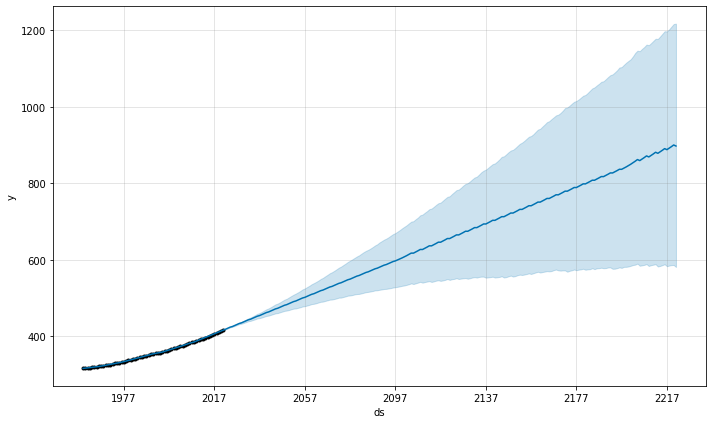

In [ ]:
fig1 = model.plot(forecast)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/YEARvsPPM.csv'
with open(path, 'w', encoding ='utf-8-sig') as f:
  forecast.to_csv(f)

Mounted at /content/drive


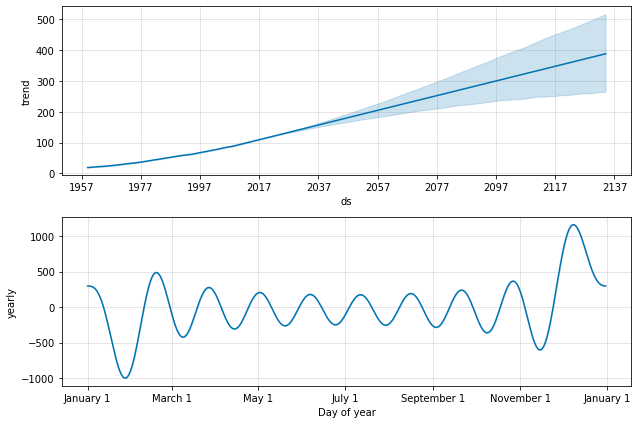

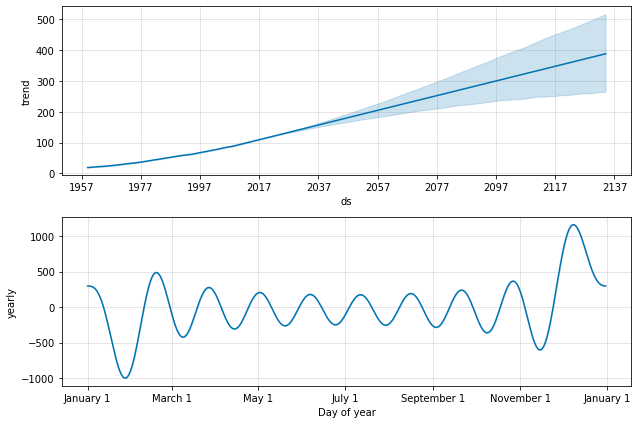

In [ ]:
model.plot_components(forecast)